In [71]:
%matplotlib inline

import os
import tempfile
from enum import IntEnum
from collections import namedtuple

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use('bmh')
sns.set()

In [72]:
import glob
import pickle

In [73]:
class SwfFields(IntEnum):
    JOB_ID = 0
    SUBMITTED = 1
    WAIT_TIME = 2
    EXEC_TIME = 3
    ALLOC_PROCS = 4
    AVG_CPU_USAGE = 5
    USED_MEM = 6
    REQ_PROCS = 7
    REQ_TIME = 8
    REQ_MEM = 9
    STATUS = 10
    USER_ID = 11
    GROUP_ID = 12
    EXECUTABLE = 13
    QUEUE_NUM = 14
    PART_NUM = 15
    PRECEDING_JOB = 16
    THINK_TIME = 17

flint = lambda x: int(float(x))    

CONVERTERS = {key: flint if key != SwfFields.AVG_CPU_USAGE else float
              for key in SwfFields}

Job = namedtuple(
    'Job', (
        'id submission_time execution_time procs cpu mem req_procs req_time req_mem '
        'status user_id group_id executable queue_num part_num preceding_job think_time wait_time'
    ).split()
)

def parse(filename):
    with open(filename, 'r') as fp:
        for line in fp:
            if ';' in line:
                continue
            fields = line.strip().split()
            if len(fields) == 19:
                del fields[6]
            fields = [CONVERTERS[SwfFields(i)](f) for i, f in enumerate(fields)]

            job = Job(
                fields[SwfFields.JOB_ID],
                fields[SwfFields.SUBMITTED],
                fields[SwfFields.EXEC_TIME],
                fields[SwfFields.ALLOC_PROCS],
                fields[SwfFields.AVG_CPU_USAGE],
                fields[SwfFields.USED_MEM],
                fields[SwfFields.REQ_PROCS],
                fields[SwfFields.REQ_TIME],
                fields[SwfFields.REQ_MEM],
                fields[SwfFields.STATUS],
                fields[SwfFields.USER_ID],
                fields[SwfFields.GROUP_ID],
                fields[SwfFields.EXECUTABLE],
                fields[SwfFields.QUEUE_NUM],
                fields[SwfFields.PART_NUM],
                fields[SwfFields.PRECEDING_JOB],
                fields[SwfFields.THINK_TIME],
                fields[SwfFields.WAIT_TIME]
            )

            yield job

def swf_to_df(fn):
    df = pd.DataFrame(data=parse(fn))
    df.index = df['id']
    return df

In [193]:
idx = 0
ext = '.pkl.bak'
pickles = glob.glob('*swf' + ext)

In [194]:
with open(pickles[idx], 'rb') as fp:
    stats, jobs = pickle.load(fp)

In [195]:
tmp = tempfile.NamedTemporaryFile(mode='w', delete=False)
print(tmp.name)
tmp.write('\n'.join(jobs))
tmp.close()
out_swf = swf_to_df(tmp.name).iloc[:]
os.unlink(tmp.name)
out_swf

/tmp/tmpp48ky7rn


,id,submission_time,execution_time,procs,cpu,mem,req_procs,req_time,req_mem,status,user_id,group_id,executable,queue_num,part_num,preceding_job,think_time,wait_time
id,,,,,,,,,,,,,,,,,,
11,11,566129,28826,1,27758.00,-1,1,28826,0,1,153,75,18180,3,-1,-1,-1,0
12,12,566290,26171,1,24666.00,-1,1,28800,0,1,153,75,18184,3,-1,-1,-1,0
13,13,567314,8071,8,7334.00,-1,8,64800,0,1,150,6,13592,4,-1,-1,-1,0
14,14,571164,64832,32,44134.00,-1,32,64832,0,1,6,6,13602,3,-1,-1,-1,0
15,15,574294,64384,7,58033.00,-1,7,64800,0,1,151,75,13607,3,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73491,73491,63562364,72,4,41.50,-1,4,1200,0,1,3,74,56630,1,-1,-1,-1,17373
73492,73492,63562563,71,4,40.25,-1,4,1200,0,1,3,74,56633,1,-1,-1,-1,17174
73493,73493,63562705,75,4,42.00,-1,4,1200,0,1,3,74,56636,1,-1,-1,-1,17032


In [196]:
orig_swf = swf_to_df(pickles[idx][:-len(ext)]).iloc[:]
orig_swf = orig_swf.loc[orig_swf.index.isin(out_swf.index)]
orig_swf

,id,submission_time,execution_time,procs,cpu,mem,req_procs,req_time,req_mem,status,user_id,group_id,executable,queue_num,part_num,preceding_job,think_time,wait_time
id,,,,,,,,,,,,,,,,,,
11,11,566129,28826,1,27758.00,-1,1,28800,-1,5,153,75,18180,3,-1,-1,-1,5
12,12,566290,26171,1,24666.00,-1,1,28800,-1,1,153,75,18184,3,-1,-1,-1,532
13,13,567314,8071,8,7334.00,-1,8,64800,-1,1,150,6,13592,4,-1,-1,-1,15757
14,14,571164,64832,32,44134.00,-1,32,64800,-1,5,6,6,13602,3,-1,-1,-1,21568
15,15,574294,64384,7,58033.00,-1,7,64800,-1,1,151,75,13607,3,-1,-1,-1,4647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73491,73491,63562364,72,4,41.50,-1,4,1200,-1,1,3,74,56630,1,-1,-1,-1,24
73492,73492,63562563,71,4,40.25,-1,4,1200,-1,1,3,74,56633,1,-1,-1,-1,11
73493,73493,63562705,75,4,42.00,-1,4,1200,-1,1,3,74,56636,1,-1,-1,-1,24


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7b5ae261d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7b5a94f890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7b5affe6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7b5a061190>],
 'fliers': [],
 'means': []}

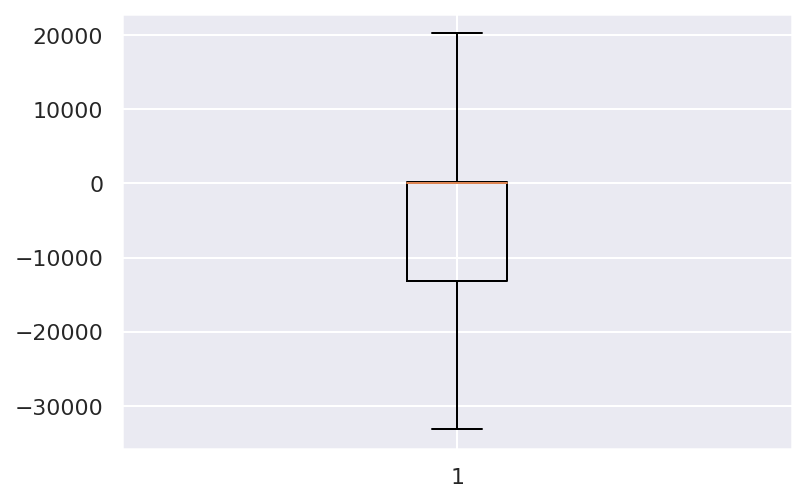

In [197]:
plt.boxplot(orig_swf.wait_time - out_swf.wait_time, showfliers=False)

In [198]:
(orig_swf.wait_time - out_swf.wait_time).median()

6.0

In [199]:
df = pd.DataFrame(index=stats.keys(), data=stats.values())
df.index = pd.to_timedelta(df.index, unit='s')
df

,utilization,offered_load,slowdown,makespan,bsld
6 days 13:15:29,0.007812,0.007812,0.000000,0,0.000000
6 days 13:18:10,0.015625,0.015625,0.000000,0,0.000000
6 days 13:35:14,0.078125,0.078125,0.000000,0,0.000000
6 days 14:39:24,0.328125,0.328125,0.000000,0,0.000000
6 days 15:31:34,0.382812,0.382812,0.000000,0,0.000000
...,...,...,...,...,...
735 days 21:03:32,0.648438,0.648438,114.037021,63579812,109.975654
735 days 21:03:34,0.617188,0.617188,114.038802,63579814,109.977510
735 days 21:03:36,0.585938,0.585938,114.041284,63579816,109.980067
735 days 21:03:40,0.578125,0.578125,114.044179,63579820,109.983037


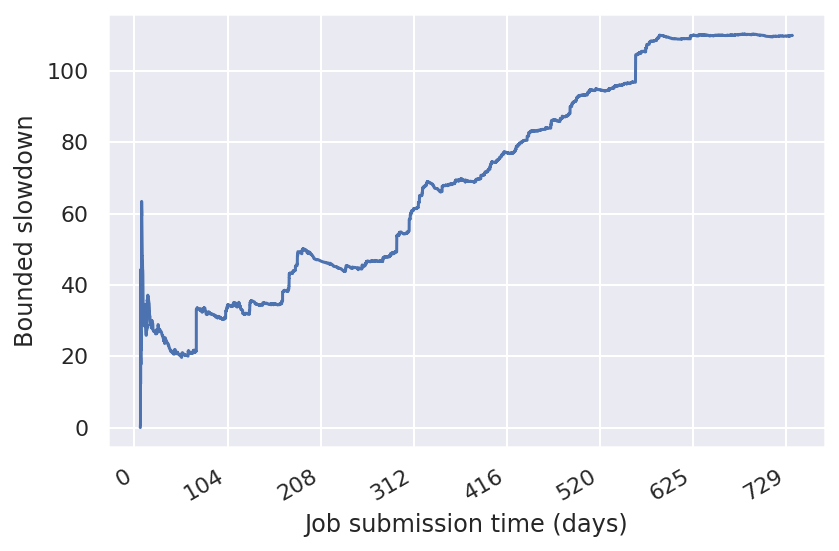

In [216]:
import matplotlib.dates as dates

data = df['bsld'].rolling(1).mean()
data.index = data.index.total_seconds() / 3600.0
ax = data.plot()
ax.set_ylabel('Bounded slowdown')
ax.set_xlabel('Job submission time (days)')
labels = ax.get_xticks().tolist()
new_labels = pd.to_timedelta(labels, unit='h').days
ax.set_xticklabels(new_labels)

plt.gcf().autofmt_xdate()

plt.tight_layout()

plt.savefig('sdsc-sp2-slowdown-easy.pdf')

In [212]:
new_labels.days

Int64Index([-105, 0, 104, 208, 312, 416, 520, 625, 729, 833], dtype='int64')

(-1, 80)

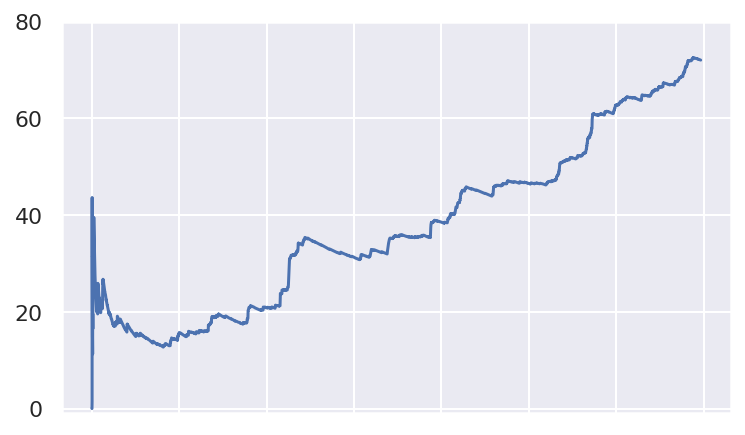

In [171]:
a = df['bsld'].rolling(2).mean()
ax = a[abs(a.index - datetime.timedelta(days=0)).argmin():abs(a.index - datetime.timedelta(days=600)).argmin()].plot()
ax.set_ylim(-1, 80)

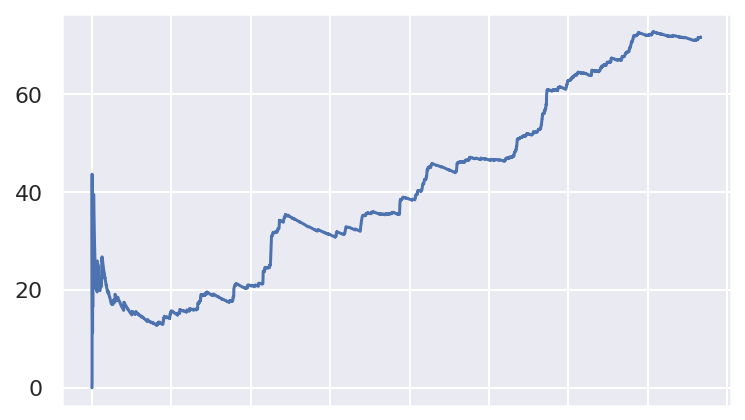

In [173]:
a = df['bsld'].rolling(2).mean()
ax = a[abs(a.index - datetime.timedelta(days=0)).argmin():].plot()

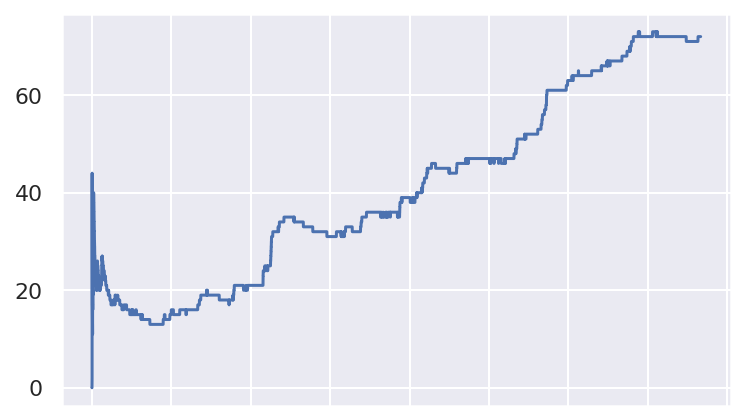

In [17]:
df['bsld'].rolling(1).mean().plot()

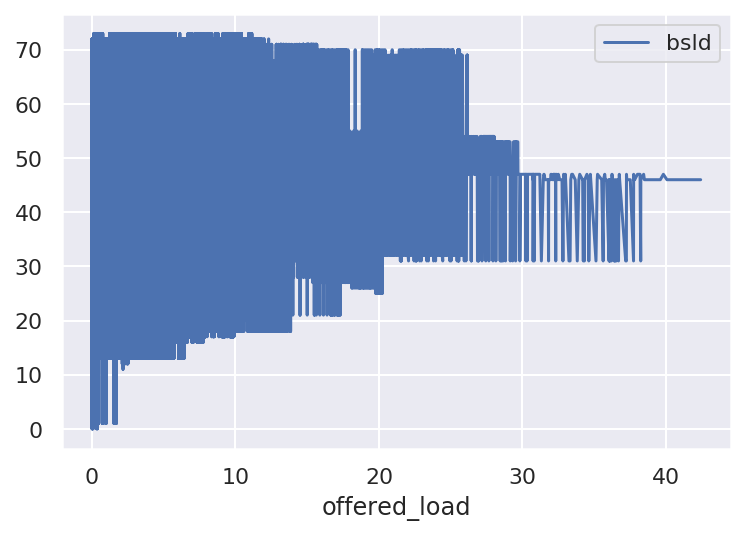

In [18]:
df['offered_load bsld'.split()].sort_values(by='offered_load').plot(x='offered_load', y='bsld')

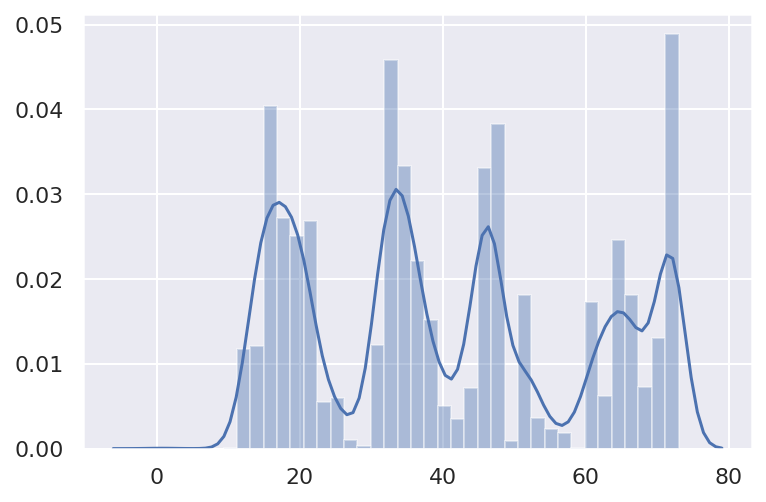

In [19]:
sns.distplot(df['bsld'.split()])

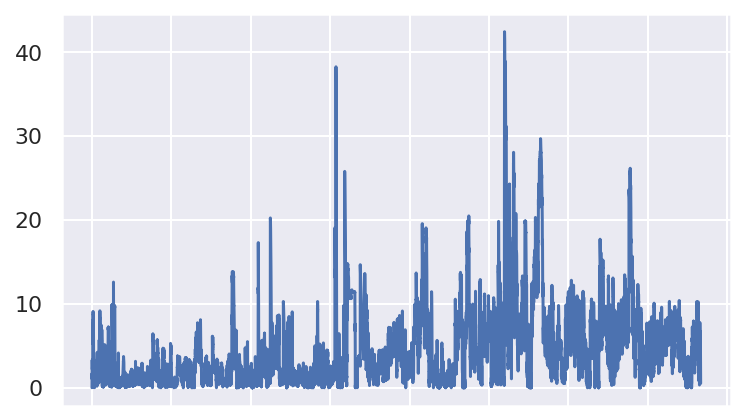

In [20]:
df['offered_load'].plot()

In [43]:
df['bsld'].mean()

60.778418323843226